# Librerías

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import re

# Mergeo

In [20]:
# === CONFIGURACIÓN ===
KEY_COL = "id" 
TEXT_COLS = ["descripcion", "salidas"]
TOP_N = 20

# === CARGA DE DATOS ===
df_orig = pd.read_csv("data/grados.csv", sep=";")
df_subs = pd.read_csv("data/grados_subs.csv", sep=";")

# === FUSIÓN ===
df = pd.merge(df_orig, df_subs, on=KEY_COL, suffixes=("_orig", "_subs"))

# === FUNCIONES AUXILIARES ===
def word_count(text):
    if pd.isna(text):
        return 0
    return len(re.findall(r"\w+", str(text)))

def word_freqs(texts, top_n=20):
    all_words = re.findall(r"\w+", " ".join(map(str, texts)).lower())
    return Counter(all_words).most_common(top_n)

df.head()

,id,nombre_orig,id_area_orig,descripcion_orig,salidas_orig,nombre_subs,id_area_subs,descripcion_subs,salidas_subs
0,1,Antropología Social y Cultural,1,Esta titulación permite tener un conocimiento ...,Los graduados en esta titulación podrán des em...,Antropología Social y Cultural,1,"Conocer y apreciar la diversidad cultural, exp...","Graduados en diversidad cultural, patrimonio e..."
1,2,Antropología Social y Cultural,15,Esta titulación permite tener un conocimiento ...,Los graduados en esta titulación podrán des em...,Antropología Social y Cultural,15,Conocer y apreciar la diversidad de sociedades...,"Graduados en diversidad cultural, patrimonio e..."
2,3,Bellas Artes,2,Los estudios de Bellas Artes tienen entre sus ...,Las profesiones que estos titulados pueden eje...,Bellas Artes,2,El Grado en Bellas Artes forma artistas plásti...,"Titulados en arte pueden ser pintores, esculto..."
3,4,Conservación y Restauración del Patrimonio Cul...,2,El Grado en Conservación y Restauración del Pa...,El ámbito de trabajo profesional del Conservad...,Conservación y Restauración del Patrimonio Cul...,2,El Grado en Conservación y Restauración del Pa...,ConservadorRestaurador en instituciones públic...
4,5,Artes Escénicas,2,Este grado está adaptado a la realidad profesi...,Estos profesionales tendrán una amplia proyecc...,Artes Escénicas,2,El Grado en Artes Escénicas capacita a jóvenes...,Profesionales con proyección multidisciplinar ...


# Visión general


 Analizando columna: descripcion
Media de palabras antes/después: 138.0 → 35.5
Reducción media (%): 70.7


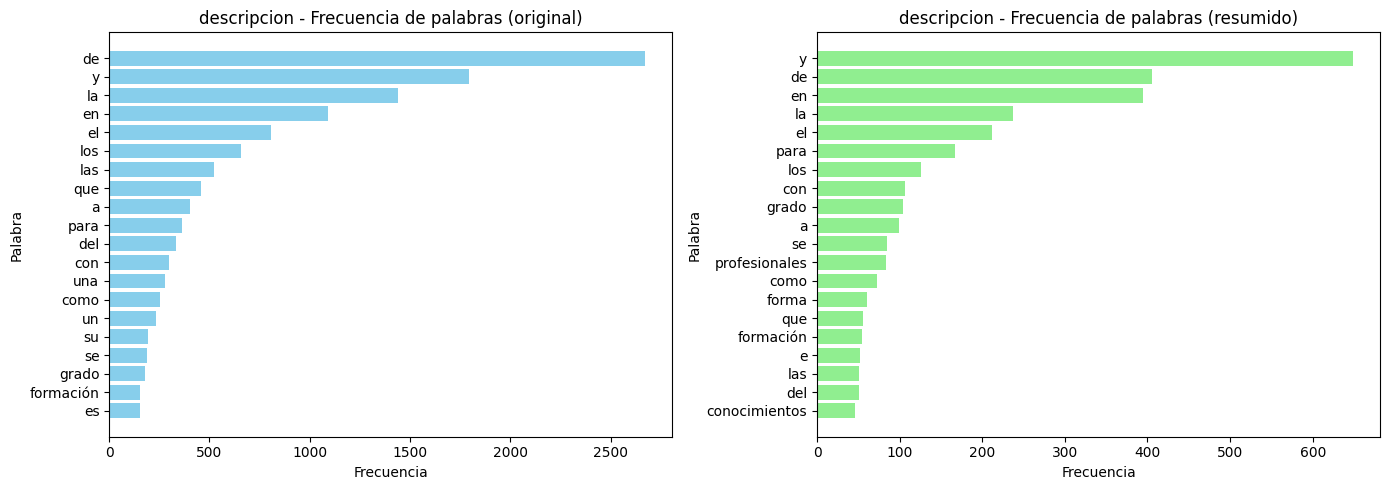

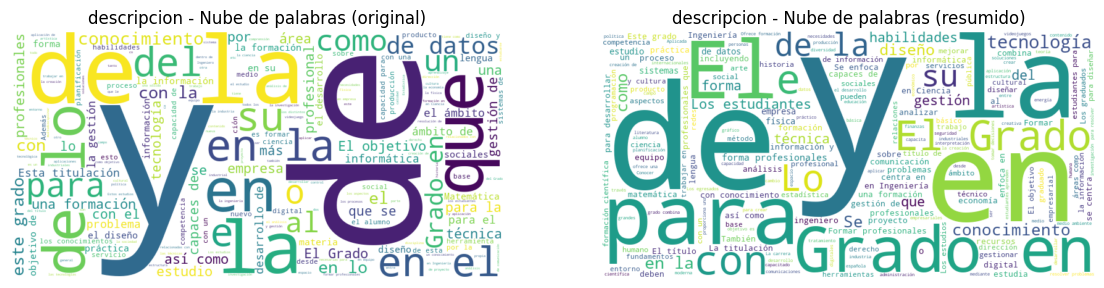


 Analizando columna: salidas
Media de palabras antes/después: 121.8 → 24.7
Reducción media (%): 76.4


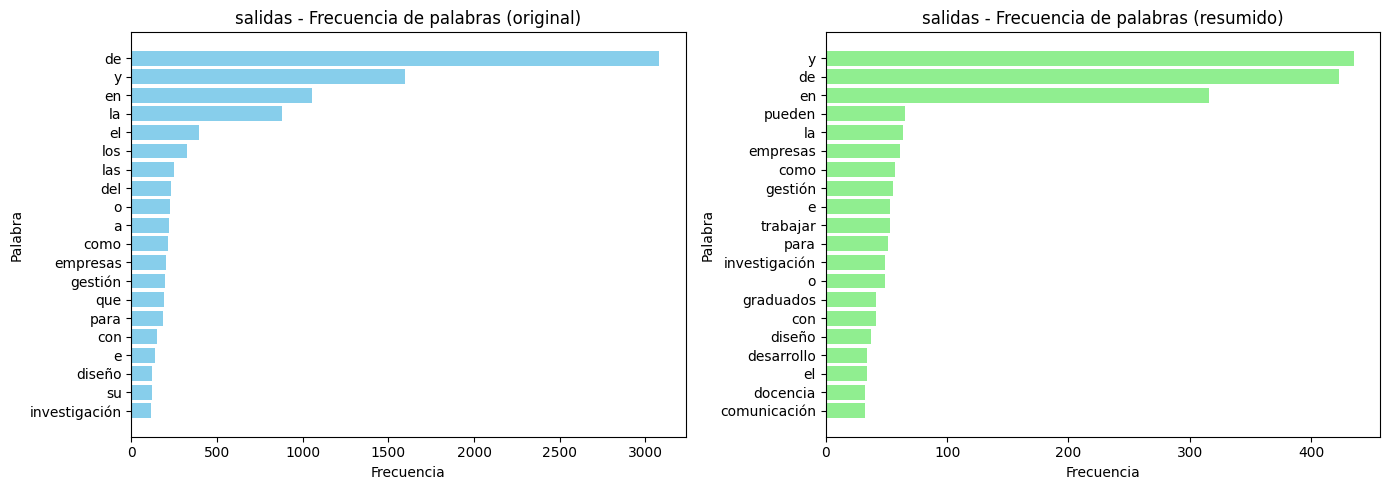

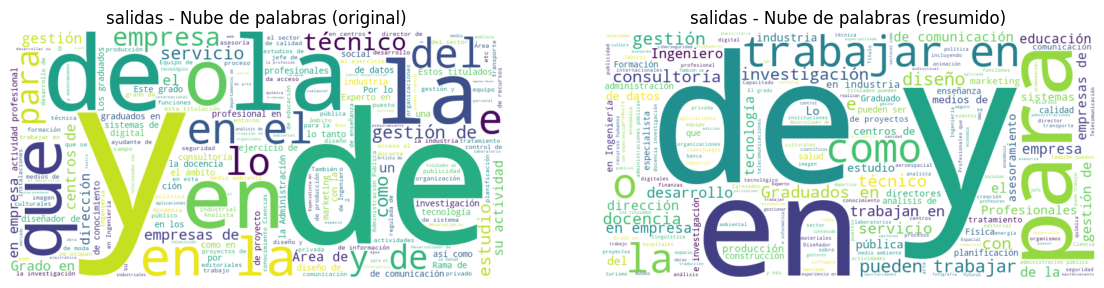


 Resultados guardados en 'comparativa_resumenes.csv'


In [21]:
for col in TEXT_COLS:
    print(f"\n Analizando columna: {col}")
    df[f"{col}_words_orig"] = df[f"{col}_orig"].apply(word_count)
    df[f"{col}_words_subs"] = df[f"{col}_subs"].apply(word_count)
    df[f"{col}_reduction_%"] = 100 * (1 - df[f"{col}_words_subs"] / df[f"{col}_words_orig"].replace(0, 1))

    print("Media de palabras antes/después:",
          round(df[f"{col}_words_orig"].mean(), 1), "→", round(df[f"{col}_words_subs"].mean(), 1))
    print("Reducción media (%):", round(df[f"{col}_reduction_%"].mean(), 1))

    # === FRECUENCIAS DE PALABRAS ===
    freq_orig = word_freqs(df[f"{col}_orig"], TOP_N)
    freq_subs = word_freqs(df[f"{col}_subs"], TOP_N)

    words_orig, counts_orig = zip(*freq_orig)
    words_subs, counts_subs = zip(*freq_subs)

    # === GRÁFICO DE FRECUENCIAS ===
    plt.figure(figsize=(14,5))
    plt.subplot(1,2,1)
    plt.barh(words_orig[::-1], counts_orig[::-1], color="skyblue")
    plt.title(f"{col} - Frecuencia de palabras (original)")
    plt.xlabel("Frecuencia")
    plt.ylabel("Palabra")

    plt.subplot(1,2,2)
    plt.barh(words_subs[::-1], counts_subs[::-1], color="lightgreen")
    plt.title(f"{col} - Frecuencia de palabras (resumido)")
    plt.xlabel("Frecuencia")
    plt.ylabel("Palabra")

    plt.tight_layout()
    plt.show()

    # === NUBE DE PALABRAS (opcional) ===
    text_orig = " ".join(map(str, df[f"{col}_orig"].dropna()))
    text_subs = " ".join(map(str, df[f"{col}_subs"].dropna()))
    
    wc_orig = WordCloud(width=800, height=400, background_color="white").generate(text_orig)
    wc_subs = WordCloud(width=800, height=400, background_color="white").generate(text_subs)
    
    plt.figure(figsize=(14,6))
    plt.subplot(1,2,1)
    plt.imshow(wc_orig, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"{col} - Nube de palabras (original)")
    
    plt.subplot(1,2,2)
    plt.imshow(wc_subs, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"{col} - Nube de palabras (resumido)")
    plt.show()

# === EXPORTAR RESULTADOS NUMÉRICOS ===
df[[KEY_COL] + [f"{col}_words_orig" for col in TEXT_COLS] +
   [f"{col}_words_subs" for col in TEXT_COLS] +
   [f"{col}_reduction_%" for col in TEXT_COLS]].to_csv("comparativa_resumenes.csv", index=False)

print("\n Resultados guardados en 'comparativa_resumenes.csv'")

## Count

 Reducción total de palabras: 76.8%


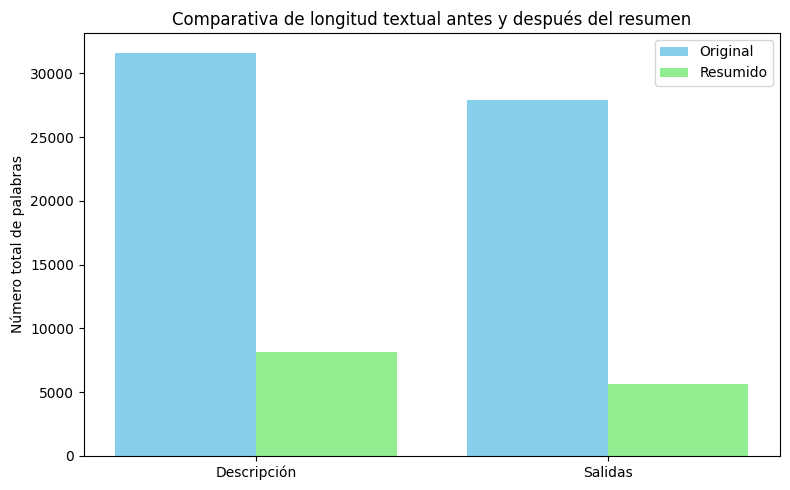

In [24]:
df = pd.read_csv("comparativa_resumenes.csv")

# Calculamos totales
totales = {
    "descripcion_original": df["descripcion_words_orig"].sum(),
    "descripcion_resumida": df["descripcion_words_subs"].sum(),
    "salidas_original": df["salidas_words_orig"].sum(),
    "salidas_resumida": df["salidas_words_subs"].sum(),
}

# Reestructuramos para graficar
labels = ["Descripción", "Salidas"]
original = [totales["descripcion_original"], totales["salidas_original"]]
resumido = [totales["descripcion_resumida"], totales["salidas_resumida"]]

# Cálculo de reducción global
reduccion_total = 100 * (1 - sum(resumido) / sum(original))
print(f" Reducción total de palabras: {reduccion_total:.1f}%")

# === GRÁFICO ===
x = range(len(labels))
plt.figure(figsize=(8,5))
plt.bar(x, original, width=0.4, label="Original", color="skyblue")
plt.bar([i + 0.4 for i in x], resumido, width=0.4, label="Resumido", color="lightgreen")

plt.xticks([i + 0.2 for i in x], labels)
plt.ylabel("Número total de palabras")
plt.title("Comparativa de longitud textual antes y después del resumen")
plt.legend()
plt.tight_layout()
plt.show()


### Comparativa de la cantidad de texto antes y después del resumen

El proceso de resumen aplicado a las columnas **`descripción`** y **`salidas`** ha permitido reducir significativamente la cantidad total de palabras, manteniendo la coherencia semántica y la informatividad esencial.

Este preprocesado sugiere que los textos resultantes son más **compactos y accesibles**, lo que:
- Mejora la **eficiencia en la indexación** y **búsqueda semántica**, reduciendo el tamaño del espacio vectorial.
- Disminuye la **carga computacional** en consultas posteriores (por ejemplo, matching).
- Mantiene los **conceptos clave** y las relaciones principales, optimizando la representación asumiendo una perdida de información no muy significativa.

Hemos pasado de textos sin procesar con este fórmato:

```
Lenguas Modernas y sus Literaturas,"Los estudios de Lenguas Modernas y sus
literaturas forman titulados particularmente
versátiles, con gran capacidad de adaptación
a distintas situaciones laborales:
- Gestión cultural.
- Gestión turística.
- Gestión y asesoramiento en documentación, archivos y bibliotecas.
- Gestión, crítica y asesoramiento en los medios de comunicación.
- Industria editorial.
- Investigación en lenguas modernas y sus
literaturas.
- Mediación lingüística e intercultural.
- Planificación y asesoramiento lingüístico.
- Profesor de lenguas modernas extranjeras
y sus literaturas en Universidades.
- Profesor de lenguas modernas y extranjeras
y sus literaturas en el Bachillerato y la ESO."
```

a formatos mucho más legibles como:

```
Lenguas Modernas y sus Literaturas,"Los graduados en Lenguas Modernas tienen habilidades versátiles para adaptarse a diversas áreas laborales, como gestión cultural, turística, documentación y medios de comunicación. También pueden trabajar en la industria editorial, investigación, mediación lingüística e intercultural, planificación lingüística o enseñar lenguas extranjeras."
```


En términos cuantitativos, se observa una reducción total aproximada del **76,8 %** en el número de palabras, lo que supone un equilibrio adecuado entre **compresión textual** y **preservación del contexto semántico**.